# Your first CNN using Tensorflow on CIFAR-10

In this task you will: 
* define your first CNN architecture for CIFAR-10 dataset using Tensorflow
* train it from scratch
* report results

CIFAR-10 dataset contains 32x32 color images from 10 classes: __airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck__:
<img src="images/cifar10.jpg" style="width:80%">

# Import Libraries

In [1]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import Model, models
from tensorflow.keras.optimizers import Adam

# Load dataset

You would use Keras datasets to load cifar 10 dataset and save it as train (x_train) and test data (x_test) with their labels, y_train and y_test, respectively

In [2]:
 ### YOUR CODE HERE
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.cifar10.load_data()


In [3]:
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


**Expected Output**:

<table>
    <tr>
        <td>
            Train samples:
        </td>
        <td>
           (50000, 32, 32, 3) (50000, 1)
        </td>
    </tr>
        <tr>
        <td>
            Test samples:
        </td>
        <td>
           (10000, 32, 32, 3) (10000, 1)
        </td>
    </tr>
        

</table>

 Define a variable for the number of classes (10) and their labels in a list cifar10_classes


In [4]:
### YOUR CODE HERE 
cifar10_classes = [[0,1,2,3,4,5,6,7,8,9],['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']]
print(cifar10_classes)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']]


Display 2 rows of 8 random images each from the training dataset






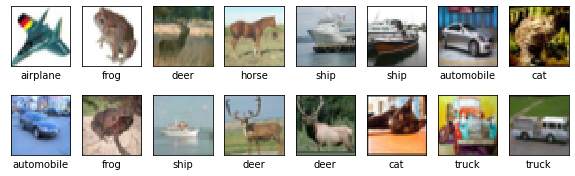

In [34]:
### YOUR CODE HERE
indices = np.random.randint(50000, size=(16))

plt.figure(figsize=(10,3))
for i in range(1,16,2):
    plt.subplot(2, 8, i)
    plt.imshow(x_train[indices[i-1]], interpolation='none')
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(cifar10_classes[1][y_train[indices[i-1]][0]])
    plt.subplot(2, 8, i+1)
    plt.imshow(x_train[indices[i]], interpolation='none')
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(cifar10_classes[1][y_train[indices[i]][0]])



# Prepare data

We need to normalize inputs like this: $$x_{norm} = \frac{x}{255} - 0.5$$

We need to convert class labels to one-hot encoded vectors. Use __tf.keras.utils.to_categorical__.

In [6]:
### YOUR CODE HERE for both test(x_test2) and training(x_train2) data
x_train2 = (x_train / 255) - 0.5
x_test2 = (x_test / 255) - 0.5


# convert class labels to one-hot encoded, should have shape (?, NUM_CLASSES)


y_train2 = tf.one_hot(y_train[:,0], len(cifar10_classes[0]), on_value=1.0, off_value=0.0)
y_test2 = tf.one_hot(y_test[:,0], len(cifar10_classes[0]), on_value=1.0, off_value=0.0)
### YOUR CODE HERE (y_train2)
print(y_train2.shape)
### YOUR CODE HERE (y_test2)
print(y_test2.shape)


(50000, 10)
(10000, 10)


# Define CNN architecture

Convolutional networks are built from several types of layers (you will be using tensorflow.keras):
- Conv2D - performs convolution:
    - **filters**: number of output channels; 
    - **kernel_size**: an integer or tuple/list of 2 integers, specifying the width and height of the 2D convolution window;
    - **padding**: padding="same" adds zero padding to the input, so that the output has the same width and height, padding='valid' performs convolution only in locations where kernel and the input fully overlap;
    - **activation**: "relu", "tanh", etc.
    - **input_shape**: shape of input.
- MaxPooling2D - performs 2D max pooling.
- Flatten - flattens the input, does not affect the batch size.
- Dense - fully-connected layer.
- Activation - applies an activation function.
- LeakyReLU - applies leaky relu activation.
- Dropout - applies dropout.

You need to define a model which takes __(None, 32, 32, 3)__ input and predicts __(None, 10)__ output with probabilities for all classes. __None__ in shapes stands for batch dimension.

Simple feed-forward networks in Keras can be defined in the following way:

```python
model = Sequential()  # start feed-forward model definition
model.add(Conv2D(..., input_shape=(32, 32, 3)))  # first layer needs to define "input_shape"

...  # here comes a bunch of convolutional, pooling and dropout layers

model.add(Dense(NUM_CLASSES), activation='softmax')  # the last layer with neuron for each class and softmax

```

Stack __4__ convolutional layers with kernel size __(3, 3)__ with growing number of filters __(16, 32, 32, 64)__, use "same" padding.

Add __2x2__ pooling layer after every 2 convolutional layers (conv-conv-pool scheme).

Use __LeakyReLU__ activation with recommended parameter __0.1__ for all layers that need it (after convolutional and dense layers):
```python
model.add(LeakyReLU(0.1))
```

Add a dense layer with __256__ neurons and a second dense layer with __10__ neurons for classes. Remember to use __Flatten__ layer before first dense layer to reshape input volume into a flat vector!

Add __Dropout__ after every pooling layer (__0.25__) and between dense layers (__0.5__).

In [7]:
def make_model():
    """
    Define your model architecture here. 
    Returns `Sequential` model.
    """
    model = models.Sequential()

    ### START CODE HERE ###
    model.add(layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.LeakyReLU(0.1))
    model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(layers.LeakyReLU(0.1))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(layers.LeakyReLU(0.1))
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.LeakyReLU(0.1))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(256))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    
    ### END CODE HERE ###
    
    return model

In [8]:
# Show model summary
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9

# Train model

Training of your model can take approx. 4-8 minutes per epoch.

During training you should observe the decrease in reported loss on training and validation.

If the loss on training is not decreasing with epochs you should revise your model definition and learning rate.

In [9]:
# Initial learning rate
INIT_LR = 0.005

# Batch size
BATCH_SIZE = 5000

# Epochs
EPOCHS = 50

Prepare model for fitting using compile (loss, optimizer, metric (accuracy))

In [10]:
### START CODE HERE ###
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=INIT_LR), loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
    
    
### END CODE HERE ###

In [11]:
# scheduler of learning rate (decay with epochs)
def lr_scheduler(epoch):
        return INIT_LR * 0.999 ** epoch

In [12]:
# callback for printing of actual learning rate used by optimizer
class LrHistory(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        tf.print(("Learning rate:",model.optimizer.lr))
   
    

Fit model using training data, batch size, epochs, callbacks. Here you would need to use callbacks parameter 
to display the changing learning rate using the functions lr_scheduler and LrHistory. The following page will help you how to use [callbacks](https://www.tensorflow.org/guide/keras/custom_callback) (see custom callbacks).

In [13]:
# fit model
### START CODE HERE ###
history = model.fit(x_train2, y_train2, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[LrHistory(), tf.keras.callbacks.LearningRateScheduler(lr_scheduler)])



Epoch 1/50
('Learning rate:', 0.005)
10/10 [==============================] - 33s 3s/step - loss: 2.4373 - accuracy: 0.1245
Epoch 2/50
('Learning rate:', 0.005)
10/10 [==============================] - 32s 3s/step - loss: 2.1498 - accuracy: 0.2275
Epoch 3/50
('Learning rate:', 0.004995)
10/10 [==============================] - 32s 3s/step - loss: 1.9726 - accuracy: 0.2924
Epoch 4/50
('Learning rate:', 0.00499000493)
10/10 [==============================] - 32s 3s/step - loss: 1.8148 - accuracy: 0.3482
Epoch 5/50
('Learning rate:', 0.00498501491)
10/10 [==============================] - 32s 3s/step - loss: 1.7072 - accuracy: 0.3845
Epoch 6/50
('Learning rate:', 0.00498003)
10/10 [==============================] - 32s 3s/step - loss: 1.6581 - accuracy: 0.4080
Epoch 7/50
('Learning rate:', 0.00497504976)
10/10 [==============================] - 32s 3s/step - loss: 1.5663 - accuracy: 0.4383
Epoch 8/50
('Learning rate:', 0.0049700751)
10/10 [==============================] - 32s 3s/step - l

# Evaluate model

In [14]:
# make test predictions

### START CODE HERE ###
test_pred = model.predict(x_test2, verbose=0)
# we want to take the max as the prediction
test_pred2 = tf.argmax(test_pred, axis=1)

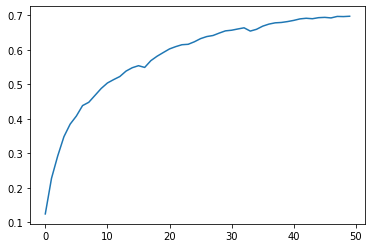

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')

## confusion matrix and accuracy

- display a 10 x 10 confusion matrix and the test accuracy. 

You may use `__sklearn.metrics__' library for confusion matrix and the accuracy score

0.7095999717712402


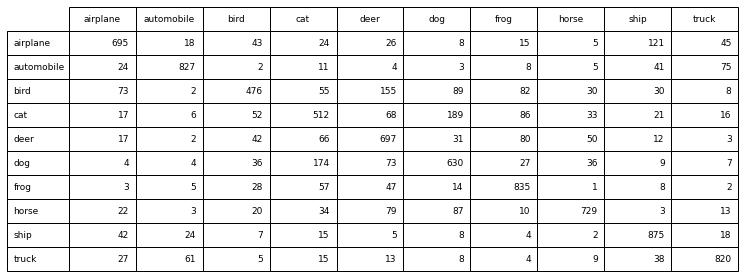

In [16]:
### START CODE HERE ###
import sklearn.metrics

matrix = sklearn.metrics.confusion_matrix(np.ndarray.flatten(y_test), test_pred2)

table = plt.table(cellText=matrix, rowLabels=cifar10_classes[1], colLabels=cifar10_classes[1], loc='center')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.box(on=None)
table.scale(2, 2)

test_loss, test_acc = model.evaluate(x_test2,  y_test2, verbose=0)
print(test_acc)

## Inspect Predictions 
- Display 2 rows of 8 images each randomly from the test set.
- On top or bottom of each of those images show the following
 - prediction label 
 - score (probability)
 - actual label

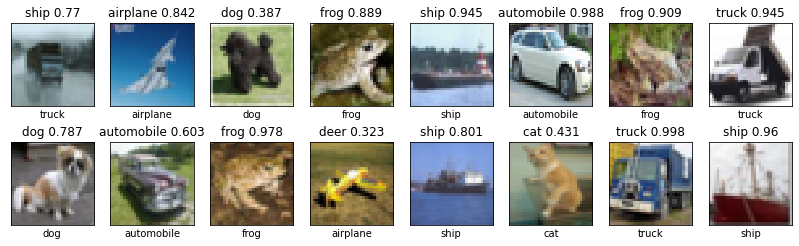

In [73]:
### START CODE HERE ###
# bottom is actual, top is prediction with %
indices = np.random.randint(10000, size=(16))

plt.figure(figsize=(14,4))
for i in range(1,16,2):
    plt.subplot(2, 8, i)
    plt.imshow(x_test[indices[i-1]], interpolation='none')
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(cifar10_classes[1][y_test[indices[i-1]][0]])
    plt.title(cifar10_classes[1][tf.keras.backend.eval(test_pred2[indices[i-1]])] + " " + str(np.around(np.max(test_pred[indices[i-1]]), decimals=3)))
    
    plt.subplot(2, 8, i+1)
    plt.imshow(x_test[indices[i]], interpolation='none')
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(cifar10_classes[1][y_test[indices[i]][0]])
    plt.title(cifar10_classes[1][tf.keras.backend.eval(test_pred2[indices[i]])] + " " + str(np.around(np.max(test_pred[indices[i]]), decimals=3)))



# Report

Report your results for the following in this notebook

- Write observations about the confusion matrix, for example how well did each category do, or were some categories
easier of difficult to classify, etc.
- Change architecture of your network and report its effect on accuracy.
- Report the effect of changing hyper parameters like learning rate, batch size, number of epochs etc.

## CMSC426 Project 4 Report
### Surmud Jamil
### Ritesh Verma
### Jordan Weschler 

### Introduction
This project was very interesting and informative. Our group worked together to complete both notebooks in a rather quick, but precise fashion. We all did our parts and were able to decipher how to build the neural network and its various parts. While there were some challenges, we were able to communicate and ultimately finish both notebooks. We had very little prior experience developing convolutional neural networks (CNN), so this project was an invaluable learning experience for all of us.

### Contributions
Every member contributed equally to this project. For the first file, Ritesh did a lot of the beginning and end methods, but Surmud and Jordan also helped in developing the conv_forward() method. For the second file, Jordan and Surmud completed most of the training setup for the models and Ritesh wrote the code for the model. Surmud then trained the model and tested it to find the optimal parameters as well as testing different loss functions. Jordan also assisted with this part and then he did most of the work in developing the confusion matrix. All members made sure everything was working correctly in both files as well. 

### CNN With Backdrop (First file)
The first notebook our group worked on was fairly simple overall, and the clear instructions as well as the “Expected Output” sections enabled us to finish the notebook and check its accuracy. The “Expected Output” section in particular helped us make sure we were on the right track. One challenge that came up was during the conv_forward() method implementation. Based upon the diagram in section 3.3, it seemed we would need to set our vert_start, horiz_start, variable to the height and width of the matrix slice respectively. When we did so, however, we were not getting the same output as the expected output. That was when we decided to set the variable values using the “stride” variable. So for example, we set vert_start = stride * h. The use of stride resulted in our output matching the expected output. We did think that creating the forward propagation would be difficult but once we started writing the code for it, it became very easy and were able to develop it rather quickly. The rest of the project was fairly simple and it was very helpful that the backward propagation was already taken care of.  The second file was much more of a challenge than the first.

### Cifar 10 Classification (Second File)
In this notebook we defined our convolutional neural network structure and trained it on the CIFAR-10 dataset consisting of the ten classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. The network was built using layers for 2D convolution, max pooling, flatten, dense, activation, LeakyRelU, and dropout. During testing, we fit our model using an initial learning rate of 0.01, and then a learning rate of 0.005. We used a batch size of 5,000 with 50 epochs. The results are listed below:

Initial - 0.01

0.9 decay - 52% accuracy

0.95 decay - 60% accuracy

0.99 decay - 63% accuracy


Initial - 0.005

0.95 decay - 63% accuracy

0.995 decay - 71% accuracy

0.999 decay - 73% accuracy


Some challenges we faced during this step were mostly related to long computational times. We found that by adjusting the batch size, learning rate, or epochs, we were able to change how long it took to run. We also tried using different loss functions to improve the performance of our network. A smaller batch size meant less accuracy, and larger epochs would give us higher accuracy. Overall, increasing the epochs/batch size while also decreasing the learning rate, usually meant higher accuracy. In terms of the neural network architecture, removing layers of the network would result in far less accuracy. The different variations of layers allow the CNN to work on more complex data sets with different types of objects, whereas a network of just one layer would not do a great job at identifying and classifying objects. We had some one-off runs of the model that resulted in accuracy as high as 73%, however we fairly consistently achieved 68%-70%.

### Confusion Matrix Analysis
Our confusion matrix with 71% accuracy is shown in the cells above.
Looking at the matrix above, we can see that the non-animals seemed to perform best for recognition. Airplanes, automobiles, ships, and trucks, all had fewer misclassifications than the animals, with the exception of cars and trucks, which were sometimes misclassified for each other, but not as much as the animals. The greater number of animal misclassifications may have been because various animals have similar features, such as legs, eyes, ears, or noses. This may result in there being a higher probability of misclassification. You can see that although a deer was correctly classified 697 times, there are also many times where deers were misclassified as cats, dogs, or birds. The same also goes for the other animal categories. 

### Conclusion
Overall, it seems that neural networks are a constant trade off of performance time and accuracy. Technological limitations and time clearly have an impact on the effectiveness of an image recognition model. This has been shown not just in this project, but in many of our other assignments as well. We look forward to making our own projects with machine learning, as well as exploring our knowledge further in other classes!
